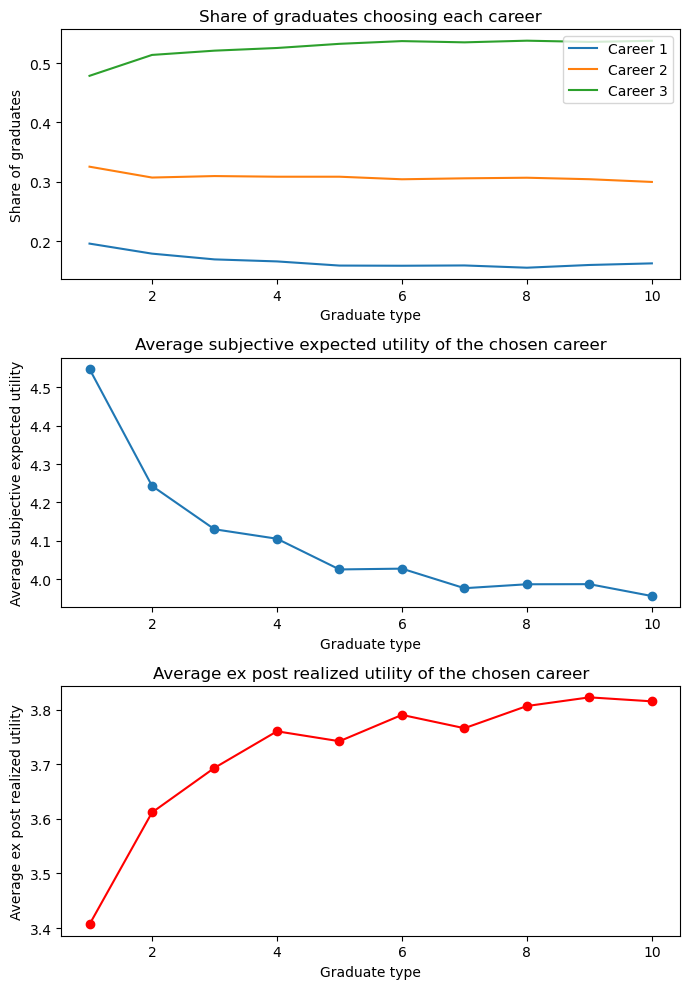

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace

# Parameters
par = SimpleNamespace()
par.J = 3  # Number of careers
par.N = 10  # Number of graduates
par.K = 10000  # Number of simulations
par.sigma = 2  # Standard deviation of noise term
par.v = np.array([1, 2, 3])  # Utility values

# Number of friends in each career for each graduate
friends = np.arange(1, par.N + 1)

# Initialize arrays to store results
chosen_careers = np.zeros((par.N, par.K), dtype=int)
prior_expected_utilities = np.zeros((par.N, par.K))
realized_utilities = np.zeros((par.N, par.K))

# Simulate for each graduate
for k in range(par.K):
    for i in range(par.N):
        fi = friends[i]
        prior_utility = np.zeros(par.J)

        for j in range(par.J):
            epsilon_friends = np.random.normal(0, par.sigma, fi)
            prior_utility[j] = par.v[j] + np.mean(epsilon_friends)

        epsilon_personal = np.random.normal(0, par.sigma, par.J)
        utilities_personal = prior_utility + epsilon_personal

        chosen_career = np.argmax(utilities_personal)
        chosen_careers[i, k] = chosen_career
        prior_expected_utilities[i, k] = utilities_personal[chosen_career]
        realized_utilities[i, k] = par.v[chosen_career] + epsilon_personal[chosen_career]

# Calculate the share of graduates choosing each career
shares = np.zeros((par.N, par.J))
for i in range(par.N):
    for j in range(par.J):
        shares[i, j] = np.mean(chosen_careers[i] == j)

average_subjective_expected_utilities = np.mean(prior_expected_utilities, axis=1)
average_realized_utilities = np.mean(realized_utilities, axis=1)

# Plot the results
fig, ax = plt.subplots(3, 1, figsize=(7, 10))

x = np.arange(1, par.N + 1)

for j in range(par.J):
    ax[0].plot(x, shares[:, j], label=f'Career {j + 1}')
ax[0].set_xlabel('Graduate type')
ax[0].set_ylabel('Share of graduates')
ax[0].legend()
ax[0].set_title('Share of graduates choosing each career')

ax[1].plot(x, average_subjective_expected_utilities, marker='o')
ax[1].set_xlabel('Graduate type')
ax[1].set_ylabel('Average subjective expected utility')
ax[1].set_title('Average subjective expected utility of the chosen career')

ax[2].plot(x, average_realized_utilities, marker='o', color='r')
ax[2].set_xlabel('Graduate type')
ax[2].set_ylabel('Average ex post realized utility')
ax[2].set_title('Average ex post realized utility of the chosen career')

plt.tight_layout()
plt.show()


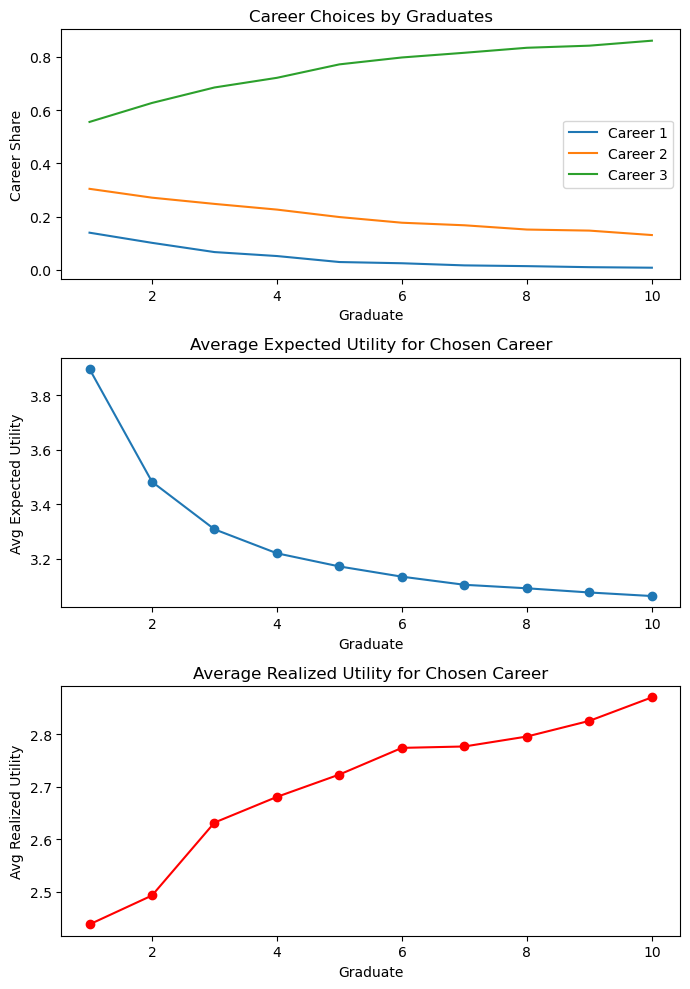

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace

# Define parameters
params = SimpleNamespace()
params.J = 3  # Number of career tracks
params.N = 10  # Number of graduates
params.K = 10000  # Number of simulations
params.sigma = 2  # Standard deviation for utility noise
params.v = np.array([1, 2, 3])  # Base utilities for each career

# Arrays to store the results
selected_careers = np.zeros((params.N, params.K), dtype=int)
expected_utilities = np.zeros((params.N, params.K))
actual_utilities = np.zeros((params.N, params.K))

# Simulation loop
for simulation in range(params.K):
    for graduate in range(1, params.N + 1):
        num_friends = graduate  # Number of friends each graduate has
        noise_friends = np.random.normal(0, params.sigma, (params.J, num_friends))  # Noise for friends' utilities
        expected_utility = params.v + np.mean(noise_friends, axis=1)  # Expected utility for each career

        personal_noise = np.random.normal(0, params.sigma, params.J)  # Noise for the graduate's utilities
        best_career = np.argmax(expected_utility)  # Select the career with the highest expected utility

        selected_careers[graduate - 1, simulation] = best_career
        expected_utilities[graduate - 1, simulation] = expected_utility[best_career]
        actual_utilities[graduate - 1, simulation] = params.v[best_career] + personal_noise[best_career]

# Calculate the proportion of graduates choosing each career
career_shares = np.zeros((params.N, params.J))
for graduate in range(params.N):
    for career in range(params.J):
        career_shares[graduate, career] = np.mean(selected_careers[graduate] == career)

avg_expected_utilities = np.mean(expected_utilities, axis=1)
avg_actual_utilities = np.mean(actual_utilities, axis=1)

# Plotting the results
fig, axes = plt.subplots(3, 1, figsize=(7, 10))

graduates = np.arange(1, params.N + 1)

# Share of graduates choosing each career
for career in range(params.J):
    axes[0].plot(graduates, career_shares[:, career], label=f'Career {career + 1}')
axes[0].set_xlabel('Graduate')
axes[0].set_ylabel('Career Share')
axes[0].set_title('Career Choices by Graduates')
axes[0].legend()

# Average expected utility
axes[1].plot(graduates, avg_expected_utilities, marker='o')
axes[1].set_xlabel('Graduate')
axes[1].set_ylabel('Avg Expected Utility')
axes[1].set_title('Average Expected Utility for Chosen Career')

# Average realized utility
axes[2].plot(graduates, avg_actual_utilities, marker='o', color='r')
axes[2].set_xlabel('Graduate')
axes[2].set_ylabel('Avg Realized Utility')
axes[2].set_title('Average Realized Utility for Chosen Career')

plt.tight_layout()
plt.show()



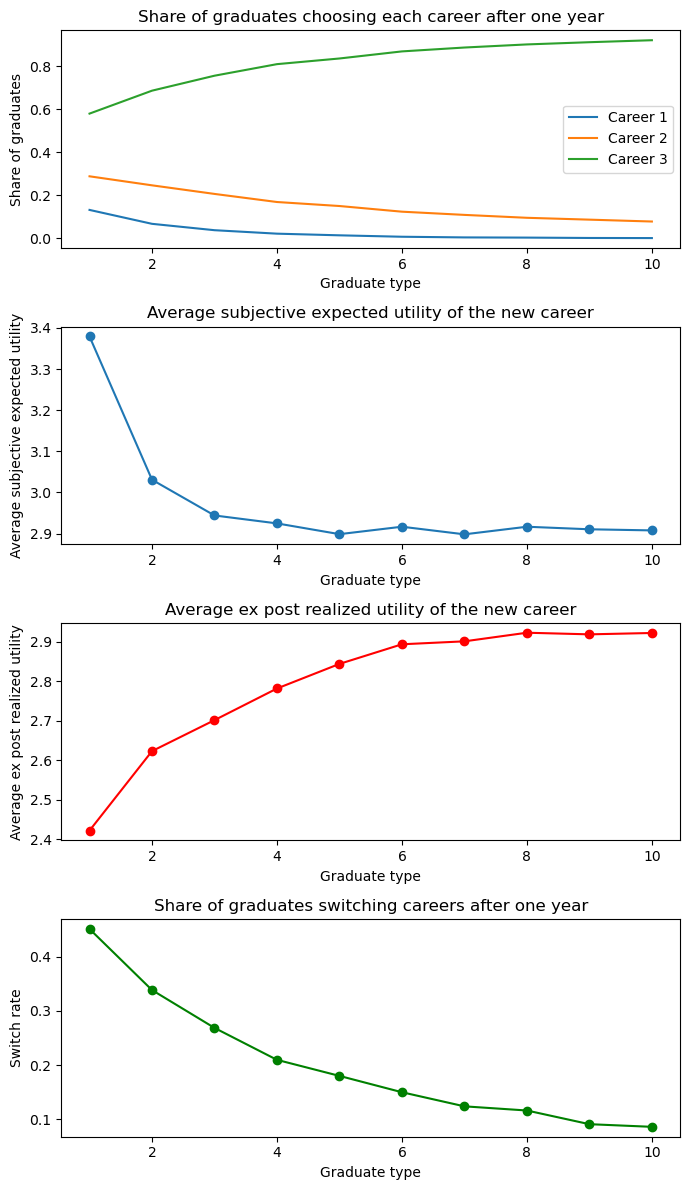

In [8]:
# Switching cost parameter
par.c = 1  # Switching cost

# Initialize arrays to store new results
new_chosen_careers = np.zeros((par.N, par.K), dtype=int)
new_prior_expected_utilities = np.zeros((par.N, par.K))
new_realized_utilities = np.zeros((par.N, par.K))
switch_decisions = np.zeros((par.N, par.K), dtype=int)

# Simulation for the second career choice
for k in range(par.K):
    for i in range(1, par.N + 1):
        F_i = i  # Number of friends for each graduate

        # Epsilon values for friends
        epsilon_friends = np.random.normal(0, par.sigma, (par.J, F_i))
        
        # Initial career choice
        initial_career = chosen_careers[i - 1, k]

        # Calculate prior expected utility including switching cost
        prior_expected_utility = par.v + np.mean(epsilon_friends, axis=1)
        prior_expected_utility -= par.c * (np.arange(par.J) != initial_career)
        
        # Draw epsilon values for the graduate
        epsilon_i = np.random.normal(0, par.sigma, par.J)
        
        # Find the new career that maximizes the prior expected utility
        new_chosen_career = np.argmax(prior_expected_utility)
        new_chosen_careers[i - 1, k] = new_chosen_career
        
        # Store the results
        new_prior_expected_utilities[i - 1, k] = prior_expected_utility[new_chosen_career]
        new_realized_utilities[i - 1, k] = par.v[new_chosen_career] + epsilon_i[new_chosen_career]
        switch_decisions[i - 1, k] = (new_chosen_career != initial_career)

# Calculate shares, average subjective expected utilities, and average realized utilities
new_shares = np.zeros((par.N, par.J))
for i in range(par.N):
    for j in range(par.J):
        new_shares[i, j] = np.mean(new_chosen_careers[i] == j)

new_average_subjective_expected_utilities = np.mean(new_prior_expected_utilities, axis=1)
new_average_realized_utilities = np.mean(new_realized_utilities, axis=1)

# Calculate the share of graduates that choose to switch careers
switch_rates = np.mean(switch_decisions, axis=1)

# Plot the results
fig, ax = plt.subplots(4, 1, figsize=(7, 12))

x = np.arange(1, par.N + 1)

for j in range(par.J):
    ax[0].plot(x, new_shares[:, j], label=f'Career {j + 1}')
ax[0].set_xlabel('Graduate type')
ax[0].set_ylabel('Share of graduates')
ax[0].legend()
ax[0].set_title('Share of graduates choosing each career after one year')

ax[1].plot(x, new_average_subjective_expected_utilities, marker='o')
ax[1].set_xlabel('Graduate type')
ax[1].set_ylabel('Average subjective expected utility')
ax[1].set_title('Average subjective expected utility of the new career')

ax[2].plot(x, new_average_realized_utilities, marker='o', color='r')
ax[2].set_xlabel('Graduate type')
ax[2].set_ylabel('Average ex post realized utility')
ax[2].set_title('Average ex post realized utility of the new career')

ax[3].plot(x, switch_rates, marker='o', color='g')
ax[3].set_xlabel('Graduate type')
ax[3].set_ylabel('Switch rate')
ax[3].set_title('Share of graduates switching careers after one year')

plt.tight_layout()
plt.show()


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from Examproblem import Problem3



ImportError: cannot import name 'Problem3' from 'Examproblem' (/Users/nikolaslindgaard/projects-2024-mikkel-nikolas-4/Examproblem.py)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from Examproblem import Problem3  # Ensure this matches the actual filename

model = Problem3()

# Generate random points and a target point
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))  # 50 random points
y = rng.uniform(size=(2,))     # Target point

# Identify points A, B, C, and D based on specific conditions
points = {
    'A': model.find_closest_point(X, y, lambda pt, y: pt[0] > y[0] and pt[1] > y[1]),
    'B': model.find_closest_point(X, y, lambda pt, y: pt[0] > y[0] and pt[1] < y[1]),
    'C': model.find_closest_point(X, y, lambda pt, y: pt[0] < y[0] and pt[1] < y[1]),
    'D': model.find_closest_point(X, y, lambda pt, y: pt[0] < y[0] and pt[1] > y[1])
}

# Calculate barycentric coordinates
coords_abc = model.point_in_triangle(points['A'], points['B'], points['C'], y) if all(points.get(k) is not None for k in ['A', 'B', 'C']) else None
coords_cda = model.point_in_triangle(points['C'], points['D'], points['A'], y) if all(points.get(k) is not None for k in ['C', 'D', 'A']) else None

# Output point information
print("Coordinates of points forming Triangle ABC:", points['A'], points['B'], points['C'])
print("Coordinates of points forming Triangle CDA:", points['C'], points['D'], points['A'])

if coords_abc:
    print("Point y is inside Triangle ABC:", coords_abc)
else:
    print("Point y is not inside Triangle ABC.")

if coords_cda:
    print("Point y is inside Triangle CDA:", coords_cda)
else:
    print("Point y is not inside Triangle CDA.")

# Plotting setup
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], color='blue', label='Random Points')
ax.scatter(y[0], y[1], color='red', label='Target Point y', s=100)
for key, pt in points.items():
    if pt is not None:
        ax.scatter(pt[0], pt[1], label=f'Point {key}', s=100, edgecolors='black')

# Draw triangles if all points are available
if all(points.get(key) is not None for key in ['A', 'B', 'C']):
    model.draw_triangle(ax, points, ['A', 'B', 'C'], 'green', 'Triangle ABC')
if all(points.get(key) is not None for key in ['C', 'D', 'A']):
    model.draw_triangle(ax, points, ['C', 'D', 'A'], 'orange', 'Triangle CDA')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title("Barycentric Interpolation Setup")
ax.legend()
plt.show()


ImportError: cannot import name 'Problem3' from 'Examproblem' (/Users/nikolaslindgaard/projects-2024-mikkel-nikolas-4/Examproblem.py)